In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
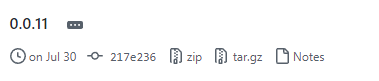

In [2]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [3]:
import DiadFit as pf
pf.__version__

'0.0.12dev'

In [4]:
# Add the path with your spectra in
mypath=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\BenBlack'

In [5]:
# This specifies what file type your Raman exported in. 
filetype='head_csv'
# Specifying the extension here helps to filter out other file types,
# e.g. png files that may be in the folder
file_ext='.csv'
# If your instrument appends a nubmer like 01, 02 to each file, prefix=True removes it
prefix=False

## This function finds all files in your path with the specified file format
- As you will fit your Ne lines in a different workbook, you can use 'exclude_str' to put any text that appears in all your Ne files, and it won't look here

In [6]:
Diad_files=pf.get_diad_files(path=mypath, file_ext=file_ext, exclude_str='Ne')
Diad_files

exclude type
.png


['007_k9.csv']

## Select the first file you want to fit
- We suggest fitting one by one, e.g. running back up to here, because you should be inspecting every fit

In [7]:
filename=Diad_files[0] # This finds the first file

# Alternatively, you can specify the actual file name if you want to fit a specific one
#filename='007_k9.csv'
print(filename)

007_k9.csv


## First we plot the spectra
- This lets you look at the spectra, decide how strong your hotbands are, and see how elevated the diads are (if they are very elevated, you may need to fit a gaussian background too)

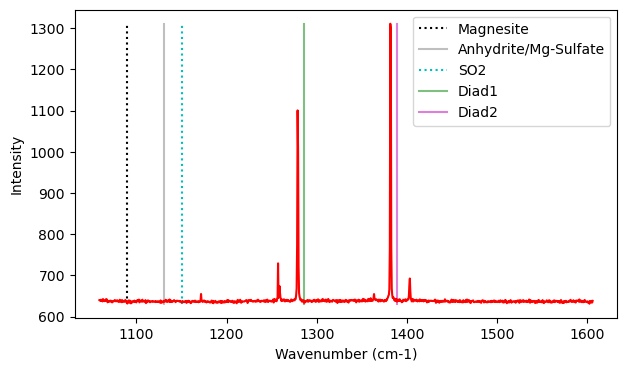

In [8]:
pf.plot_diad(path=mypath, filename=filename, filetype=filetype)

## After inspecting the spectra, decide if you want to fit the carbonate peak
- First, look at the presets, you can edit them in carb_peak_config by typing the variable name, and a new value

In [9]:
# Decide if you want to fit a carbonate peak or not here. 
fit_carbonate=False
# Tweak options here, can exclude a range for example using exclude_range=Tuple[float, float]
Carb_Config=pf.carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330))
Carb_Config   

carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330), N_poly_carb_bck=1, amplitude=1000, cent_carbonate=1090, outlier_sigma=12, N_peaks=3, distance=10, prominence=5, width=6, threshold=0.1, exclude_range=None, dpi=100, plot_figure=True)

## This actually does the work

In [10]:
Carb_fit=pf.fit_carbonate_peak(config=Carb_Config, path=mypath, 
filename=filename, filetype=filetype,
fit_carbonate=fit_carbonate)
Carb_fit

## Now lets plot the diads
- As with carbonate, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

In [11]:
diad_id_config=pf.diad_id_config()
diad_id_config

diad_id_config(exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1385), approx_diad1_pos=(1275, 1280), height=400, distance=5, threshold=0.5, width=0.5, prominence=10, plot_figure=True)

Initial estimates: Diad1+HB=[1278.8], Diad2+HB=[1381.6 1403.3]


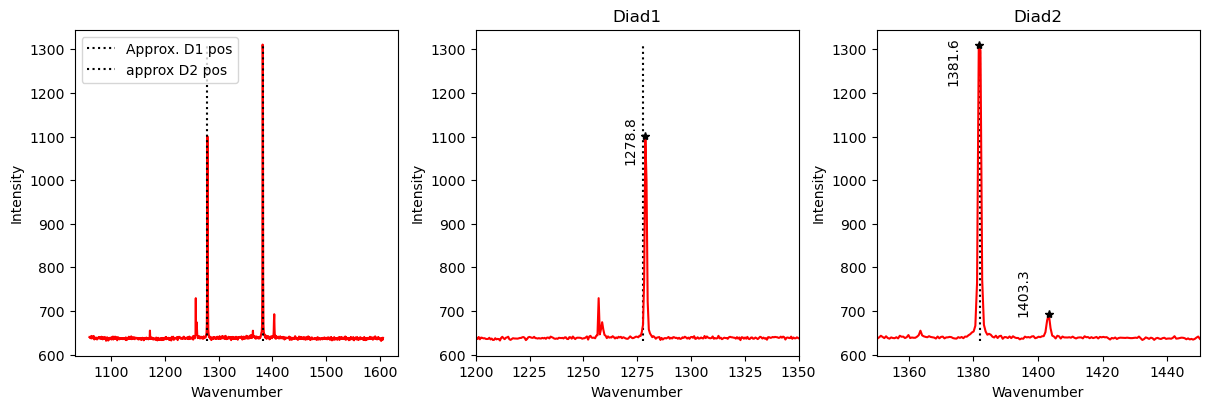

In [12]:
# Specify the number of peaks, 1 = just peak, 2 = Peak+hot bands
n_peaks_diad1=1
n_peaks_diad2=2 

    
diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config, path=mypath, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2)

## If you have no diads visible...
- change True to False

In [13]:
diads_present=True
pf.proceed_to_fit_diads(filename, Carb_fit, diads_present=diads_present)

Move on to fit diads


## Fit Diad 1
- This function uses the guess of the peak parameters above. You can choose to fit a gaussian background. Else, use a polynomial and specify background positions
- If plot_figure=True, it saves the figure in its own folder in the path, so you can inspect all the fits at a later date. 

In [14]:
diad1_fit_config=pf.diad1_fit_config(x_range_residual=10, x_range_baseline=10)
diad1_fit_config

diad1_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1300, 1350), amplitude=100, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

Making summary figure of different fits for saving


,Diad1_Cent,Diad1_Area,Residual_Diad1
0,1278.990373,671.052873,3.116137


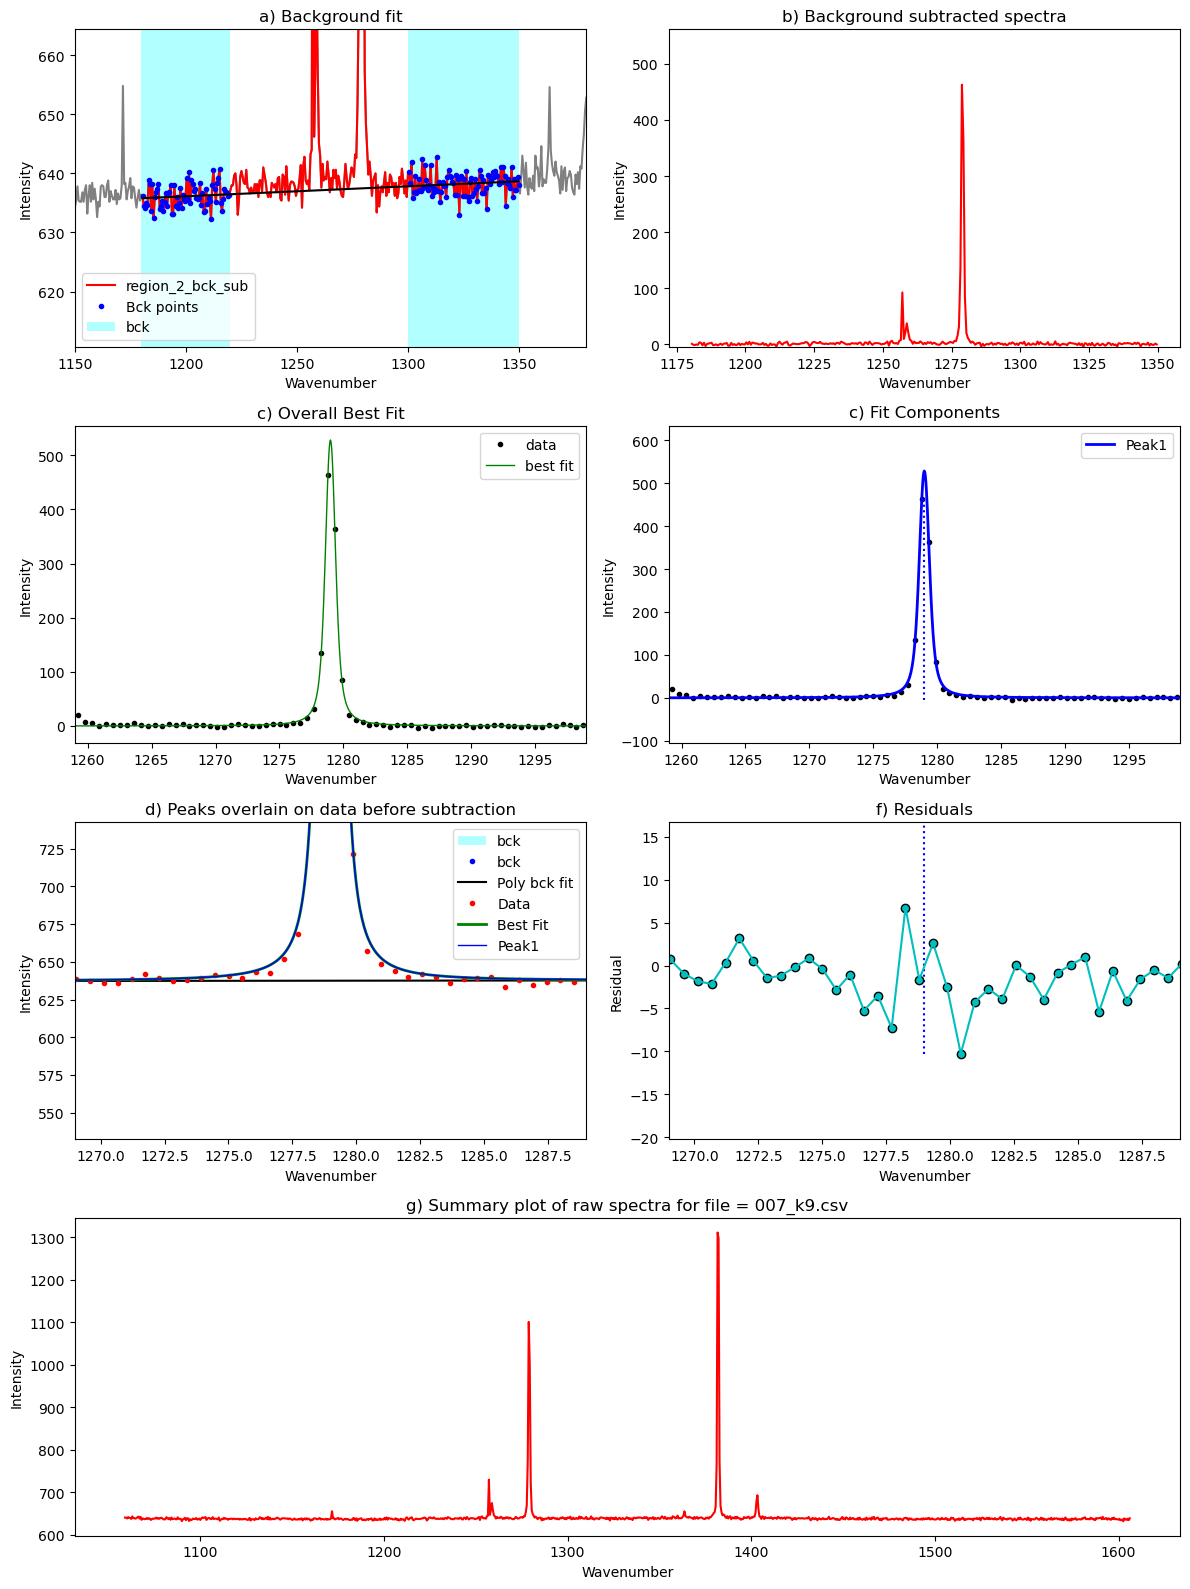

In [15]:
# For very dense spectra, with a very elevated background, you'll need to add a gaussian fit
# If you put a number in brackets, it'll center a gaussian extra background near there. 

# Do you want to save the figure?
plot_figure=True
# This function does the work fitting the diad
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=mypath, filename=filename, filetype=filetype)
Diad1_fit

## Fit diad 2

In [18]:
diad2_fit_config=pf.diad2_fit_config(x_range_residual=10, x_range_baseline=10)
diad2_fit_config

diad2_fit_config(peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000, N_poly_bck_diad2=1, lower_bck_diad2=(1300, 1360), upper_bck_diad2=(1440, 1470), amplitude=100, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

1381.8958230514238
<Parameter 'sigma', value=0.2182062550384023 +/- 0.00347, bounds=[0:inf]>
made df
Making summary figure of different fits for saving
Index(['Diad2_Cent', 'Diad2_Area', 'HB2_Cent', 'HB2_Area', 'Residual_Diad2'], dtype='object')


,Diad2_Cent,Diad2_Area,HB2_Cent,HB2_Area,Residual_Diad2
0,1381.895824,972.534232,1403.184341,85.962758,1.854763


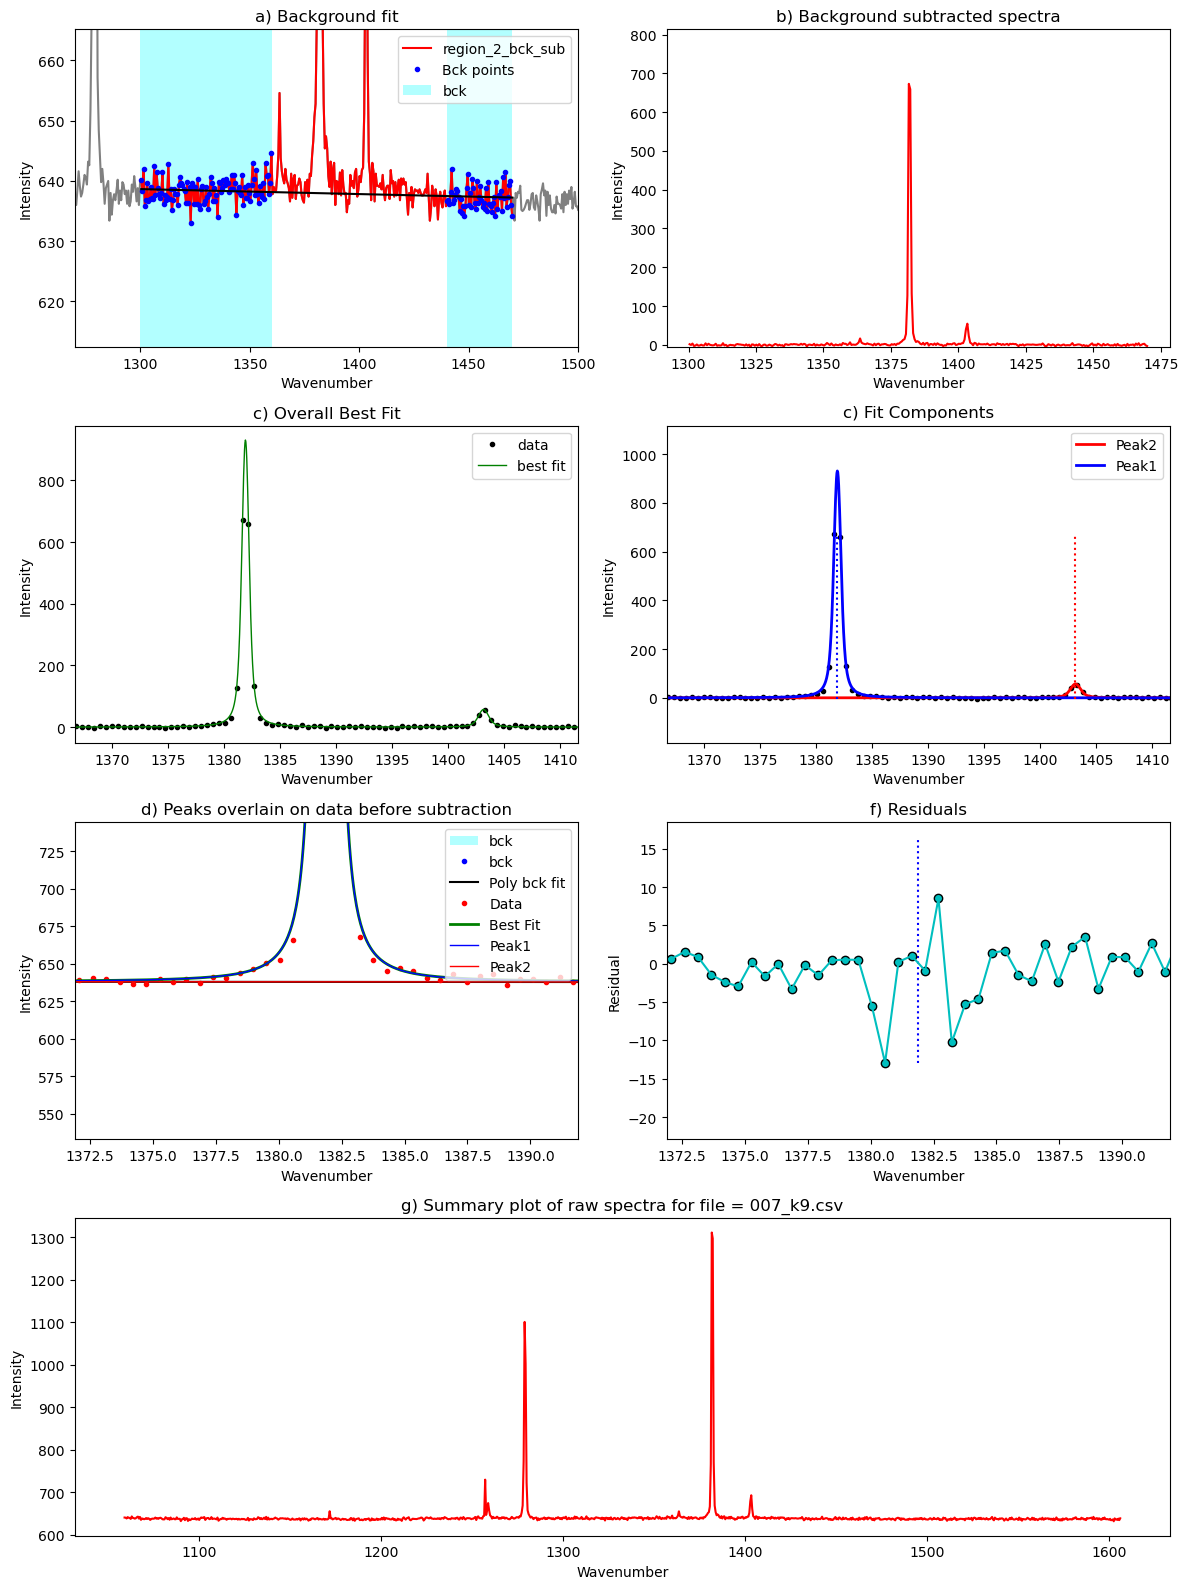

In [19]:
# Do you want to save the figure?
plot_figure=True
# This function does the work fitting the diad
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad2_peaks,
path=mypath, filename=filename, filetype=filetype)
Diad2_fit

## Combine and save
- Saves to clipboard if to_clipboard=True (e.g. you can paste into a spreadsheet)
- Also saves to 'csv' in a folder in "mypath" if to_csv=True)
- It also makes a new 

In [20]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, to_clipboard=True, to_csv=True, path=mypath,
Diad2_fit=Diad2_fit, Carb_fit=Carb_fit)
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Residual_Diad1,Diad2_Cent,Diad2_Area,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,007_k9.csv,102.905451,1278.990373,671.052873,3.116137,1381.895824,972.534232,1.854763,NaN,0,1403.184341,85.962758,NaN,0
